<a href="https://colab.research.google.com/github/Denilza/Cientista-de-Dados/blob/main/ExerciciosRegress%C3%A3o.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

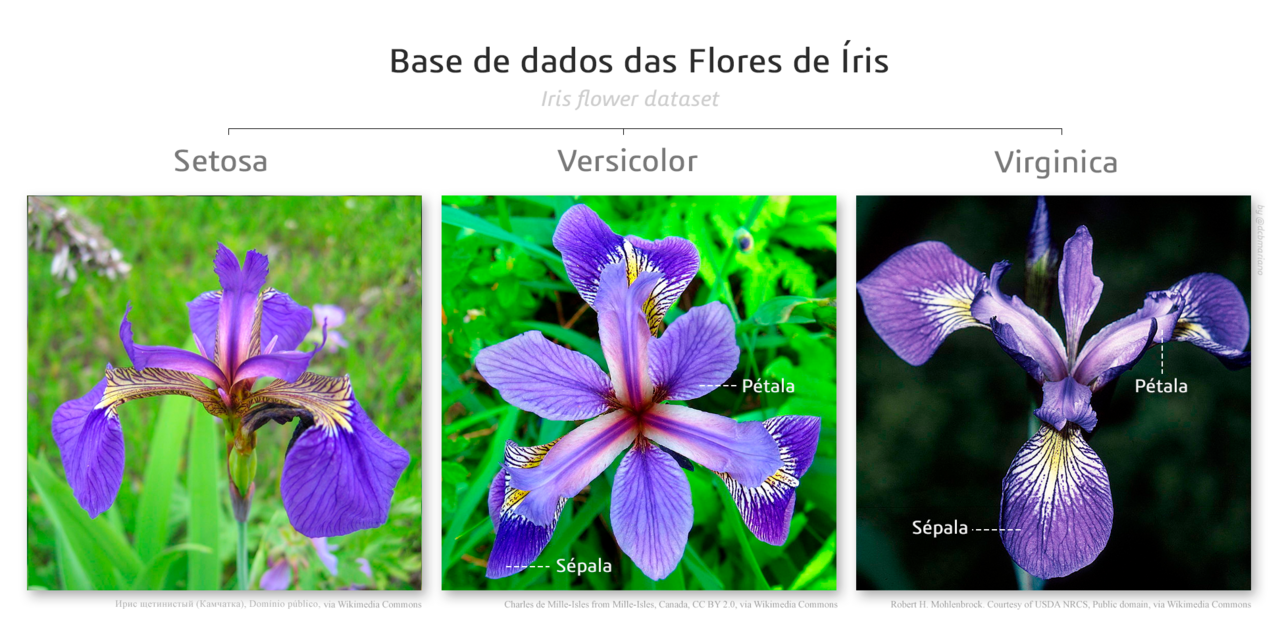

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import io
import requests
from scipy import stats
import gdown
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, accuracy_score
from sklearn.metrics import accuracy_score, classification_report, precision_score, recall_score
from sklearn.metrics import confusion_matrix, precision_recall_curve, roc_curve, auc, log_loss


# Replacing 'view?usp=sharing' with 'export?format=csv' to download the raw CSV
file_id = '1HEhhGL3c6bNPM9itZUlp3H784u6zneHg'
url = f'https://drive.google.com/uc?id={file_id}&export=download'


gdown.download(url, 'data.csv', quiet=False)

# Carregando o arquivo em CSV e convertendo para DataFrame
# Replacing 'error_bad_lines' with 'on_bad_lines' and setting it to 'skip' to skip problematic rows
df_class = pd.read_csv('data.csv', on_bad_lines='skip')

Downloading...
From: https://drive.google.com/uc?id=1HEhhGL3c6bNPM9itZUlp3H784u6zneHg&export=download
To: /content/data.csv
100%|██████████| 3.87k/3.87k [00:00<00:00, 9.18MB/s]


In [ ]:
df_class.head()

,Sepal_Length,Sepal_Width,Petal_Length,Petal_Width,Species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [ ]:
from sklearn import datasets
iris = datasets.load_iris()


a. Faça uma análise inicial sobre esse dataset


In [ ]:
df_class.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Sepal_Length  150 non-null    float64
 1   Sepal_Width   150 non-null    float64
 2   Petal_Length  150 non-null    float64
 3   Petal_Width   150 non-null    float64
 4   Species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [ ]:
from sklearn import datasets
import pandas as pd # Import pandas

iris = datasets.load_iris()
df_class = pd.DataFrame(iris.data, columns=iris.feature_names) # Create DataFrame with original column names

# Add the 'Species' column using the target names
df_class['Species'] = [iris.target_names[i] for i in iris.target]

# Now you can filter and describe
setosa_data = df_class[df_class['Species'] == 'setosa']
df_class_setosa_describe = setosa_data.describe() # Describe the filtered data

# Print or use the descriptive statistics
print(df_class_setosa_describe)

       sepal length (cm)  sepal width (cm)  petal length (cm)  \
count           50.00000         50.000000          50.000000   
mean             5.00600          3.428000           1.462000   
std              0.35249          0.379064           0.173664   
min              4.30000          2.300000           1.000000   
25%              4.80000          3.200000           1.400000   
50%              5.00000          3.400000           1.500000   
75%              5.20000          3.675000           1.575000   
max              5.80000          4.400000           1.900000   

       petal width (cm)  
count         50.000000  
mean           0.246000  
std            0.105386  
min            0.100000  
25%            0.200000  
50%            0.200000  
75%            0.300000  
max            0.600000  


In [ ]:
# Now you can filter and describe
setosa_data = df_class[df_class['Species'] == 'versicolor']
df_class_setosa_describe = setosa_data.describe() # Describe the filtered data

# Print or use the descriptive statistics
print(df_class_setosa_describe)

       sepal length (cm)  sepal width (cm)  petal length (cm)  \
count          50.000000         50.000000          50.000000   
mean            5.936000          2.770000           4.260000   
std             0.516171          0.313798           0.469911   
min             4.900000          2.000000           3.000000   
25%             5.600000          2.525000           4.000000   
50%             5.900000          2.800000           4.350000   
75%             6.300000          3.000000           4.600000   
max             7.000000          3.400000           5.100000   

       petal width (cm)  
count         50.000000  
mean           1.326000  
std            0.197753  
min            1.000000  
25%            1.200000  
50%            1.300000  
75%            1.500000  
max            1.800000  


In [ ]:
# Now you can filter and describe
setosa_data = df_class[df_class['Species'] == 'virginica']
df_class_setosa_describe = setosa_data.describe() # Describe the filtered data

# Print or use the descriptive statistics
print(df_class_setosa_describe)

       sepal length (cm)  sepal width (cm)  petal length (cm)  \
count           50.00000         50.000000          50.000000   
mean             6.58800          2.974000           5.552000   
std              0.63588          0.322497           0.551895   
min              4.90000          2.200000           4.500000   
25%              6.22500          2.800000           5.100000   
50%              6.50000          3.000000           5.550000   
75%              6.90000          3.175000           5.875000   
max              7.90000          3.800000           6.900000   

       petal width (cm)  
count          50.00000  
mean            2.02600  
std             0.27465  
min             1.40000  
25%             1.80000  
50%             2.00000  
75%             2.30000  
max             2.50000  


In [ ]:
df_class.isnull().sum()

,0
Sepal_Length,0
Sepal_Width,0
Petal_Length,0
Petal_Width,0
Species,150


In [ ]:
df_class.dropna(inplace=True)

In [ ]:
#verificando nulos
df_class.duplicated().sum()

0

In [ ]:
#excluindo nulos
df_class.drop_duplicates(inplace=True)

In [ ]:
# Para exibir as primeiras 5 linhas de cada classe (Species)
df_class.groupby('Species').head(10)


,Sepal_Length,Sepal_Width,Petal_Length,Petal_Width,Species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa
5,5.4,3.9,1.7,0.4,setosa
6,4.6,3.4,1.4,0.3,setosa
7,5.0,3.4,1.5,0.2,setosa
8,4.4,2.9,1.4,0.2,setosa
9,4.9,3.1,1.5,0.1,setosa


In [ ]:
df_class.describe()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
count,149.000000,149.000000,149.000000,149.000000
mean,5.843624,3.059732,3.748993,1.194631
std,0.830851,0.436342,1.767791,0.762622
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.300000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [ ]:
# Calculate correlation only for numerical columns
numerical_cols = df_class.select_dtypes(include=['number']).columns
df_class[numerical_cols].corr()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
sepal length (cm),1.000000,-0.118129,0.873738,0.820620
sepal width (cm),-0.118129,1.000000,-0.426028,-0.362894
petal length (cm),0.873738,-0.426028,1.000000,0.962772
petal width (cm),0.820620,-0.362894,0.962772,1.000000


In [ ]:
# Verificando as contagens de valor
df_class["Species"].value_counts()

,count
Species,
setosa,50
versicolor,50
virginica,49


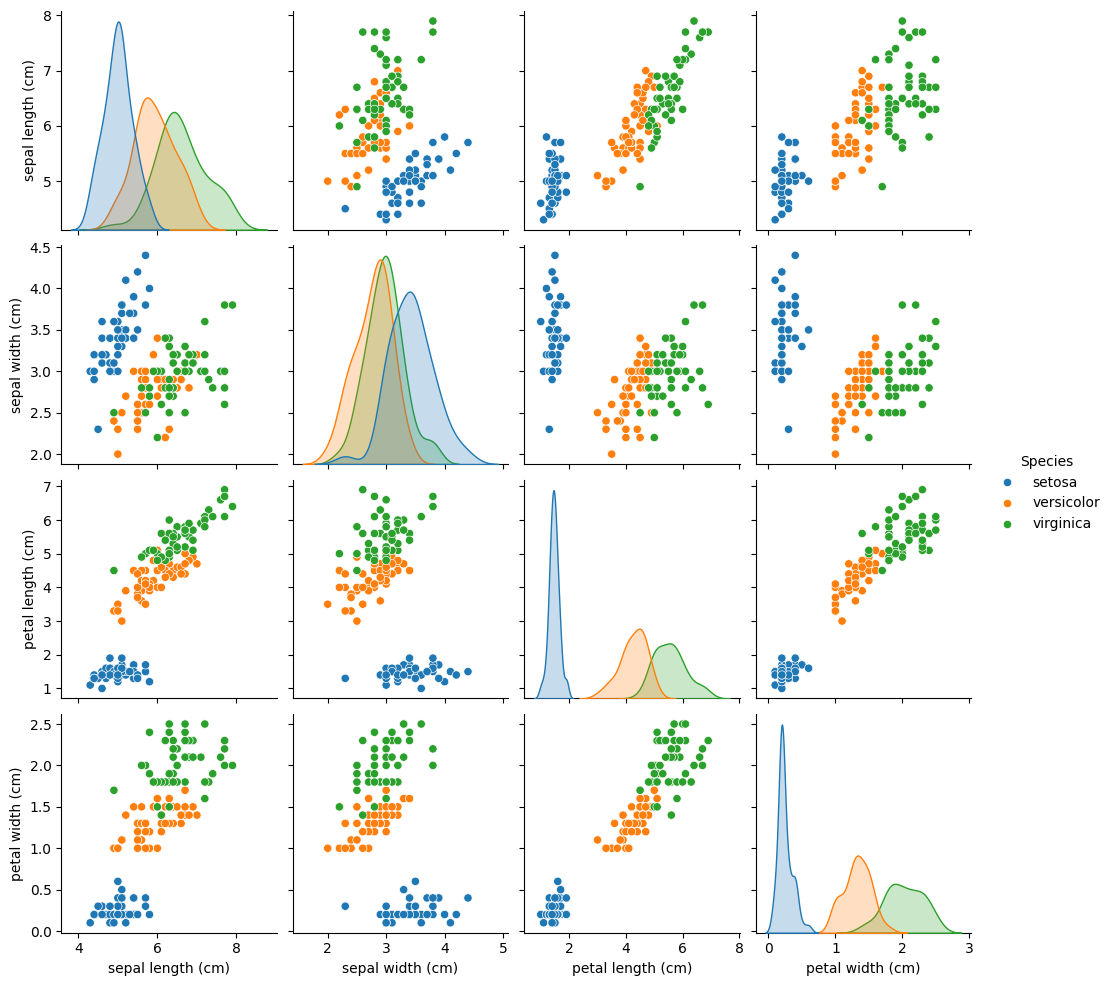

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Visualize todo o conjunto de dados
sns.pairplot(df_class, hue="Species")
plt.show()

Há uma alta correlação entre as colunas de comprimento e largura das pétalas no conjunto de dados Iris. A espécie Setosa tem comprimento e largura de pétalas baixos, enquanto a espécie Versicolor tem comprimento e largura médios. A espécie Virginica, por outro lado, tem comprimento e largura altos de pétalas. Em termos de dimensões de sépalas, a espécie Setosa tem largura de sépala alta e comprimento de sépala baixo, a espécie Versicolor tem valores médios para ambas as dimensões de sépalas, e a espécie Virginica tem largura de sépala pequena, mas comprimento de sépala grande.

b. Use o boxplot e o histograma para caracterizar as propriedades
de cada uma das espécies existentes.


Index(['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)',
       'petal width (cm)', 'Species'],
      dtype='object')


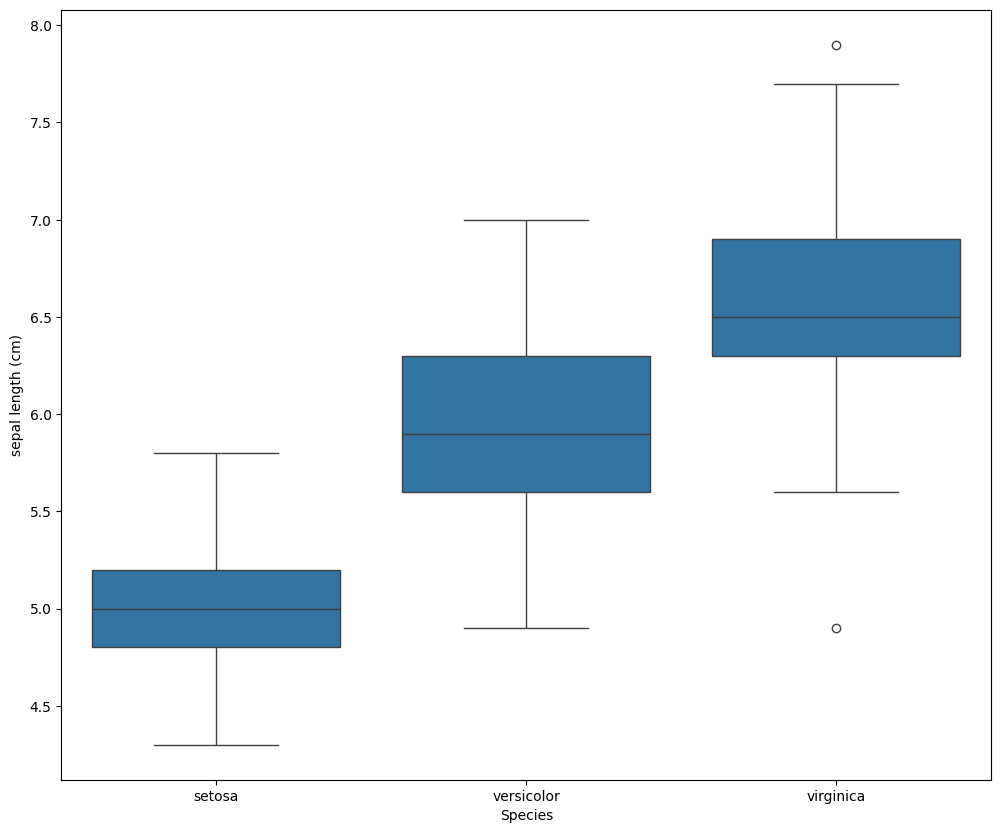

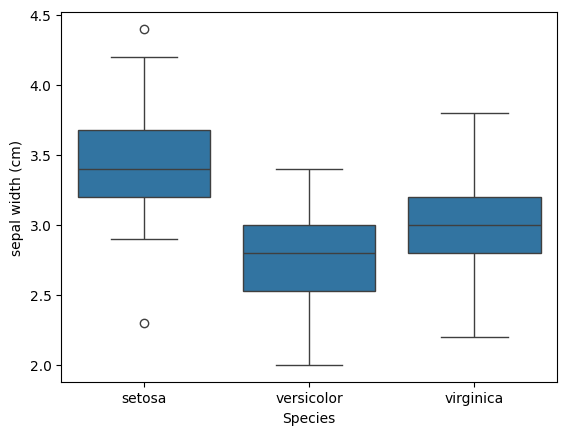

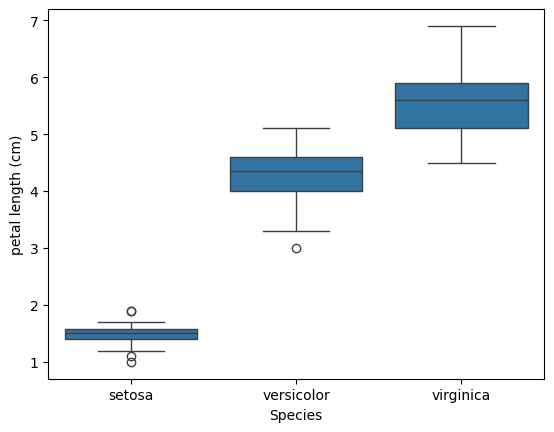

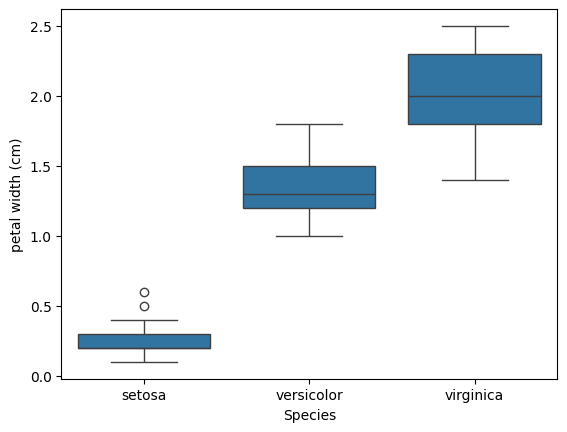

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

print(df_class.columns) # Nomes das colunas

# Ajustar o tamanho da figura
plt.figure(figsize=(12, 10))

# Plotando o boxplot
sns.boxplot(data=df_class, x='Species', y='sepal length (cm)')
plt.show()

sns.boxplot(data=df_class, x='Species', y='sepal width (cm)')
plt.show()

sns.boxplot(data=df_class, x='Species', y='petal length (cm)')
plt.show()

sns.boxplot(data=df_class, x='Species', y='petal width (cm)')
plt.show()

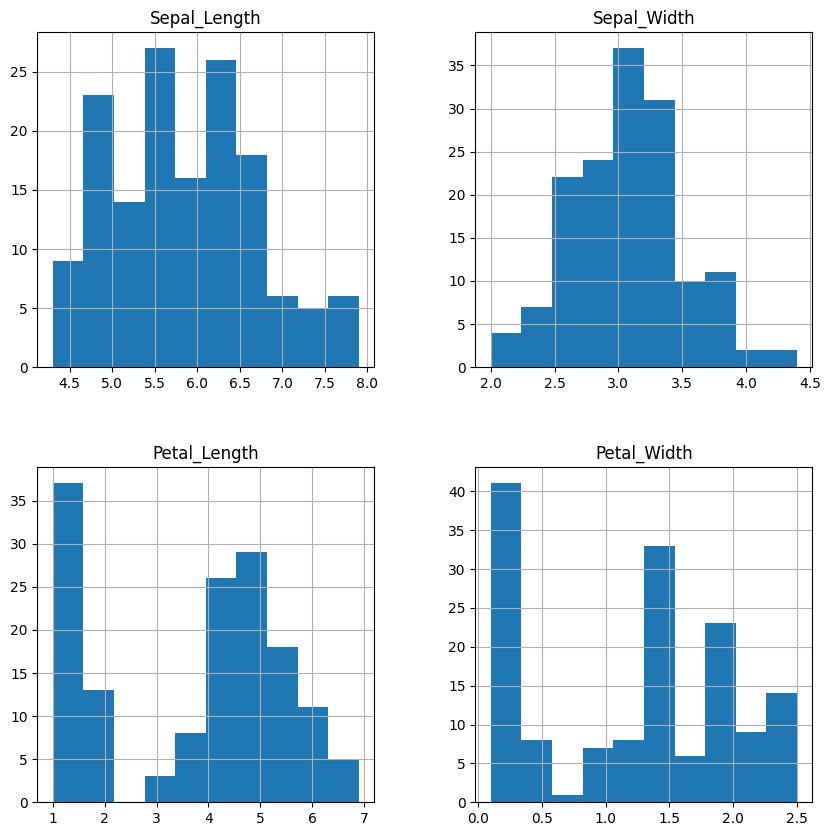

In [ ]:
histograms = df_class.hist(figsize=(10, 10))
plt.show()

c. Somente olhando esses gráficos, é possível afirmar que uma ou mais
propriedades (Sepal_Length, Sepal_Width, Petal_Length, Petal_Width)
são suficientes para distinguir as espécies?

Sim! A espécie Setosa tem características menores e menos distribuídas em comparação com as outras duas espécies. A espécie Versicolor é distribuída de forma média e tem características de tamanho médio. A espécie Virginica, por outro lado, é altamente distribuída com um grande número de valores e características. Os valores médios e medianos de várias características (como comprimento e largura da sépala e comprimento e largura da pétala) são claramente mostrados por cada gráfico para cada espécie. Isso sugere que a distribuição dessas características varia significativamente entre as três espécies.

*  d. Aplique a regressão logística para avaliar o modelo de
classificação.
*  e. Calcule a acurácia, precisão e recall.

*  f. Plote a matriz de confusão com matplotlib ou seaborn.



Acurácia: 1.0
Precisão: 1.0
Recall: 1.0
Relatório de Classificação:
               precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        11
  versicolor       1.00      1.00      1.00        13
   virginica       1.00      1.00      1.00         6

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30



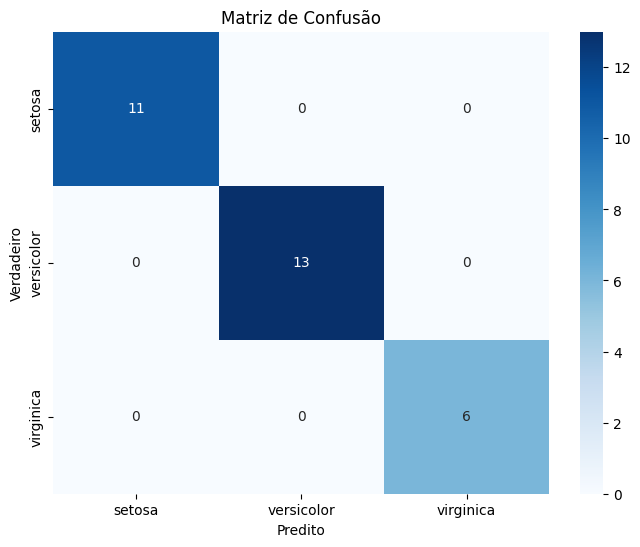

In [ ]:
# Separação entre variáveis independentes e dependente
X = df_class[['Sepal_Length', 'Sepal_Width', 'Petal_Length', 'Petal_Width']]
y = df_class['Species']

# Dividir o dataset em treino e teste (80% treino, 20% teste)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

# Instanciar e treinar o modelo de regressão logística
model = LogisticRegression(max_iter=200)
model.fit(X_train, y_train)

# Fazer previsões
y_pred = model.predict(X_test)

# Calcular acurácia, precisão e recall
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')
class_report = classification_report(y_test, y_pred)

# Exibir resultados
print("Acurácia:", accuracy)
print("Precisão:", precision)
print("Recall:", recall)
print("Relatório de Classificação:\n", class_report)

# Plotar a matriz de confusão
conf_matrix = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=y.unique(), yticklabels=y.unique())
plt.xlabel('Predito')
plt.ylabel('Verdadeiro')
plt.title('Matriz de Confusão')
plt.show()

2. Utilizando o dataset load_digits. Exemplo de como fazer a
importação do dataset usando o sklearn:



In [ ]:
from sklearn.datasets import load_digits
digits = load_digits()

a. Faça uma análise inicial sobre esse
dataset
*   i. Quantos dados possui?
*   ii. Existem dados nulos? Se sim quantos?
*   iii. Todos são dados numéricos ou existem colunas com dados
categóricos?

In [ ]:
df_digits = pd.DataFrame(digits.data, columns=digits.feature_names)
df_digits['target'] = digits.target
df_digits.head()


,pixel_0_0,pixel_0_1,pixel_0_2,pixel_0_3,pixel_0_4,pixel_0_5,pixel_0_6,pixel_0_7,pixel_1_0,pixel_1_1,...,pixel_6_7,pixel_7_0,pixel_7_1,pixel_7_2,pixel_7_3,pixel_7_4,pixel_7_5,pixel_7_6,pixel_7_7,target
0,0.0,0.0,5.0,13.0,9.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,6.0,13.0,10.0,0.0,0.0,0.0,0
1,0.0,0.0,0.0,12.0,13.0,5.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,11.0,16.0,10.0,0.0,0.0,1
2,0.0,0.0,0.0,4.0,15.0,12.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,3.0,11.0,16.0,9.0,0.0,2
3,0.0,0.0,7.0,15.0,13.0,1.0,0.0,0.0,0.0,8.0,...,0.0,0.0,0.0,7.0,13.0,13.0,9.0,0.0,0.0,3
4,0.0,0.0,0.0,1.0,11.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,2.0,16.0,4.0,0.0,0.0,4


In [ ]:
df_digits.shape

(1797, 65)

In [ ]:
#verificando nulos
df_digits.duplicated().sum()

0

In [ ]:
df_digits.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1797 entries, 0 to 1796
Data columns (total 65 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   pixel_0_0  1797 non-null   float64
 1   pixel_0_1  1797 non-null   float64
 2   pixel_0_2  1797 non-null   float64
 3   pixel_0_3  1797 non-null   float64
 4   pixel_0_4  1797 non-null   float64
 5   pixel_0_5  1797 non-null   float64
 6   pixel_0_6  1797 non-null   float64
 7   pixel_0_7  1797 non-null   float64
 8   pixel_1_0  1797 non-null   float64
 9   pixel_1_1  1797 non-null   float64
 10  pixel_1_2  1797 non-null   float64
 11  pixel_1_3  1797 non-null   float64
 12  pixel_1_4  1797 non-null   float64
 13  pixel_1_5  1797 non-null   float64
 14  pixel_1_6  1797 non-null   float64
 15  pixel_1_7  1797 non-null   float64
 16  pixel_2_0  1797 non-null   float64
 17  pixel_2_1  1797 non-null   float64
 18  pixel_2_2  1797 non-null   float64
 19  pixel_2_3  1797 non-null   float64
 20  pixel_2_

Todos os dados são númericos

*   b. Aplique a regressão logística para construir e avaliar o modelo de
classificação.
*   c. Calcule a acurácia, precisão e recall com base no desempenho do modelo.
*   d. Plote a matriz de confusão dos resultados do modelo utilizando matplotlib
ou seaborn.


Acurácia: 0.9694444444444444
Precisão: 0.9698983873983874
Recall: 0.9694444444444444
Relatório de Classificação:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        27
           1       0.92      0.97      0.94        35
           2       0.97      0.97      0.97        36
           3       0.97      1.00      0.98        29
           4       0.97      0.97      0.97        30
           5       0.97      0.95      0.96        40
           6       1.00      0.98      0.99        44
           7       0.97      0.97      0.97        39
           8       0.97      0.92      0.95        39
           9       0.95      0.98      0.96        41

    accuracy                           0.97       360
   macro avg       0.97      0.97      0.97       360
weighted avg       0.97      0.97      0.97       360



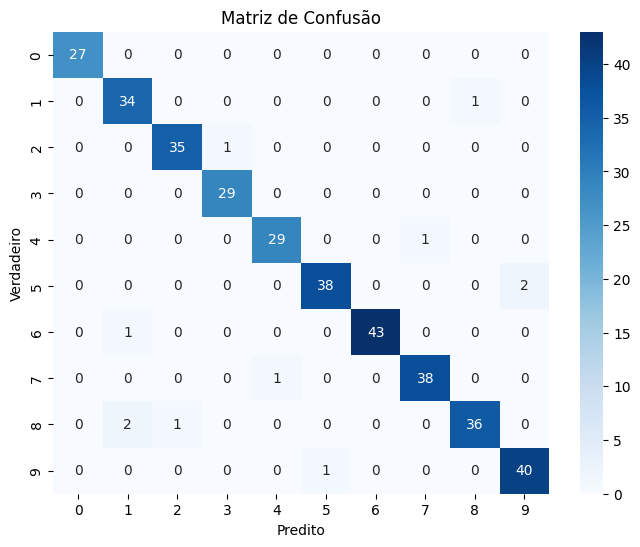

In [ ]:
# Separação entre variáveis independentes e dependente
X = df_digits.drop(columns=['target'])
y = df_digits['target']

# Dividir o dataset em treino e teste (80% treino, 20% teste)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

# Instanciar e treinar o modelo de regressão logística
model = LogisticRegression(max_iter=200)
model.fit(X_train, y_train)

# Fazer previsões
y_pred = model.predict(X_test)

# Calcular acurácia, precisão e recall
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')
class_report = classification_report(y_test, y_pred)

# Exibir resultados
print("Acurácia:", accuracy)
print("Precisão:", precision)
print("Recall:", recall)
print("Relatório de Classificação:\n", class_report)

# Plotar a matriz de confusão
conf_matrix = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=y.unique(), yticklabels=y.unique())
plt.xlabel('Predito')
plt.ylabel('Verdadeiro')
plt.title('Matriz de Confusão')
plt.show()


*   e. Aplique a regressão logística para avaliar o modelo de classificação dos
dígitos de 0 a 9 utilizando o conjunto de dados específico para esse problema
(por exemplo, MNIST).
*   f. Calcule a acurácia, precisão e recall com base no desempenho do modelo
para a classificação dos dígitos de 0 a 9.
*   g. Plote a matriz de confusão dos resultados da classificação dos dígitos de 0
a 9 utilizando matplotlib ou seaborn

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(


Acurácia: 0.9258
Precisão: 0.9256065268001826
Recall: 0.9258
Relatório de Classificação:
               precision    recall  f1-score   support

           0       0.95      0.98      0.96       980
           1       0.96      0.98      0.97      1135
           2       0.93      0.90      0.91      1032
           3       0.90      0.91      0.91      1010
           4       0.94      0.94      0.94       982
           5       0.90      0.87      0.88       892
           6       0.94      0.95      0.95       958
           7       0.93      0.92      0.93      1028
           8       0.88      0.88      0.88       974
           9       0.91      0.92      0.91      1009

    accuracy                           0.93     10000
   macro avg       0.92      0.92      0.92     10000
weighted avg       0.93      0.93      0.93     10000



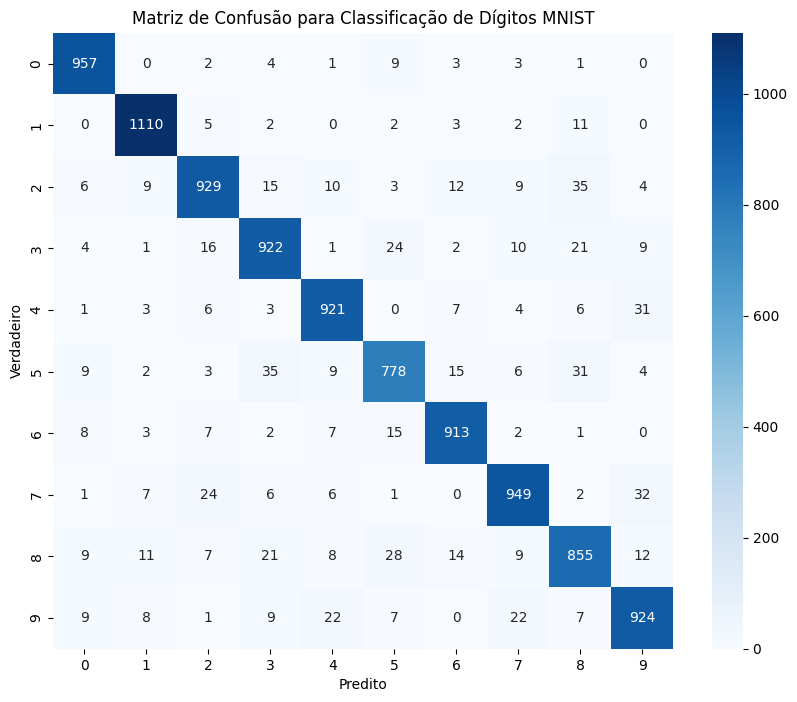

In [ ]:
import tensorflow as tf
# Carregar o conjunto de dados MNIST
(X_train, y_train), (X_test, y_test) = tf.keras.datasets.mnist.load_data()

# Redimensionar as imagens para vetores unidimensionais
X_train = X_train.reshape(X_train.shape[0], -1) / 255.0  # Normalizar os pixels para o intervalo [0, 1]
X_test = X_test.reshape(X_test.shape[0], -1) / 255.0

# Instanciar e treinar o modelo de regressão logística
model = LogisticRegression(max_iter=1000, solver='lbfgs', multi_class='multinomial')
model.fit(X_train, y_train)

# Fazer previsões
y_pred = model.predict(X_test)

# Calcular acurácia, precisão, e recall
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')
class_report = classification_report(y_test, y_pred)

# Exibir resultados
print("Acurácia:", accuracy)
print("Precisão:", precision)
print("Recall:", recall)
print("Relatório de Classificação:\n", class_report)

# Plotar a matriz de confusão
conf_matrix = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(10, 8))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=range(10), yticklabels=range(10))
plt.xlabel('Predito')
plt.ylabel('Verdadeiro')
plt.title('Matriz de Confusão para Classificação de Dígitos MNIST')
plt.show()